In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv(r"C:\Users\71591\Desktop\dataset\Fish.csv")

# Display the DataFrame
df


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
#get a summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


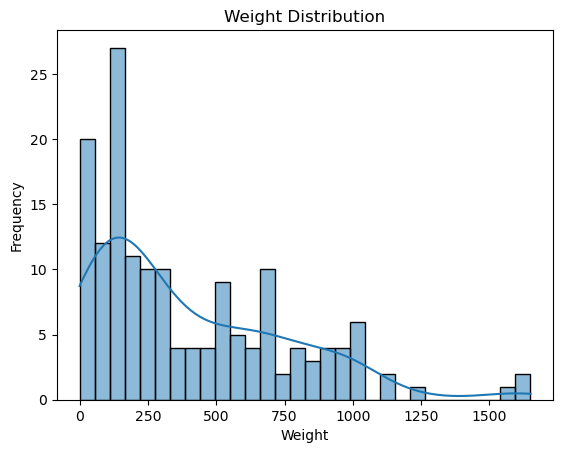

In [6]:
sb.histplot(df['Weight'], bins=30, kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

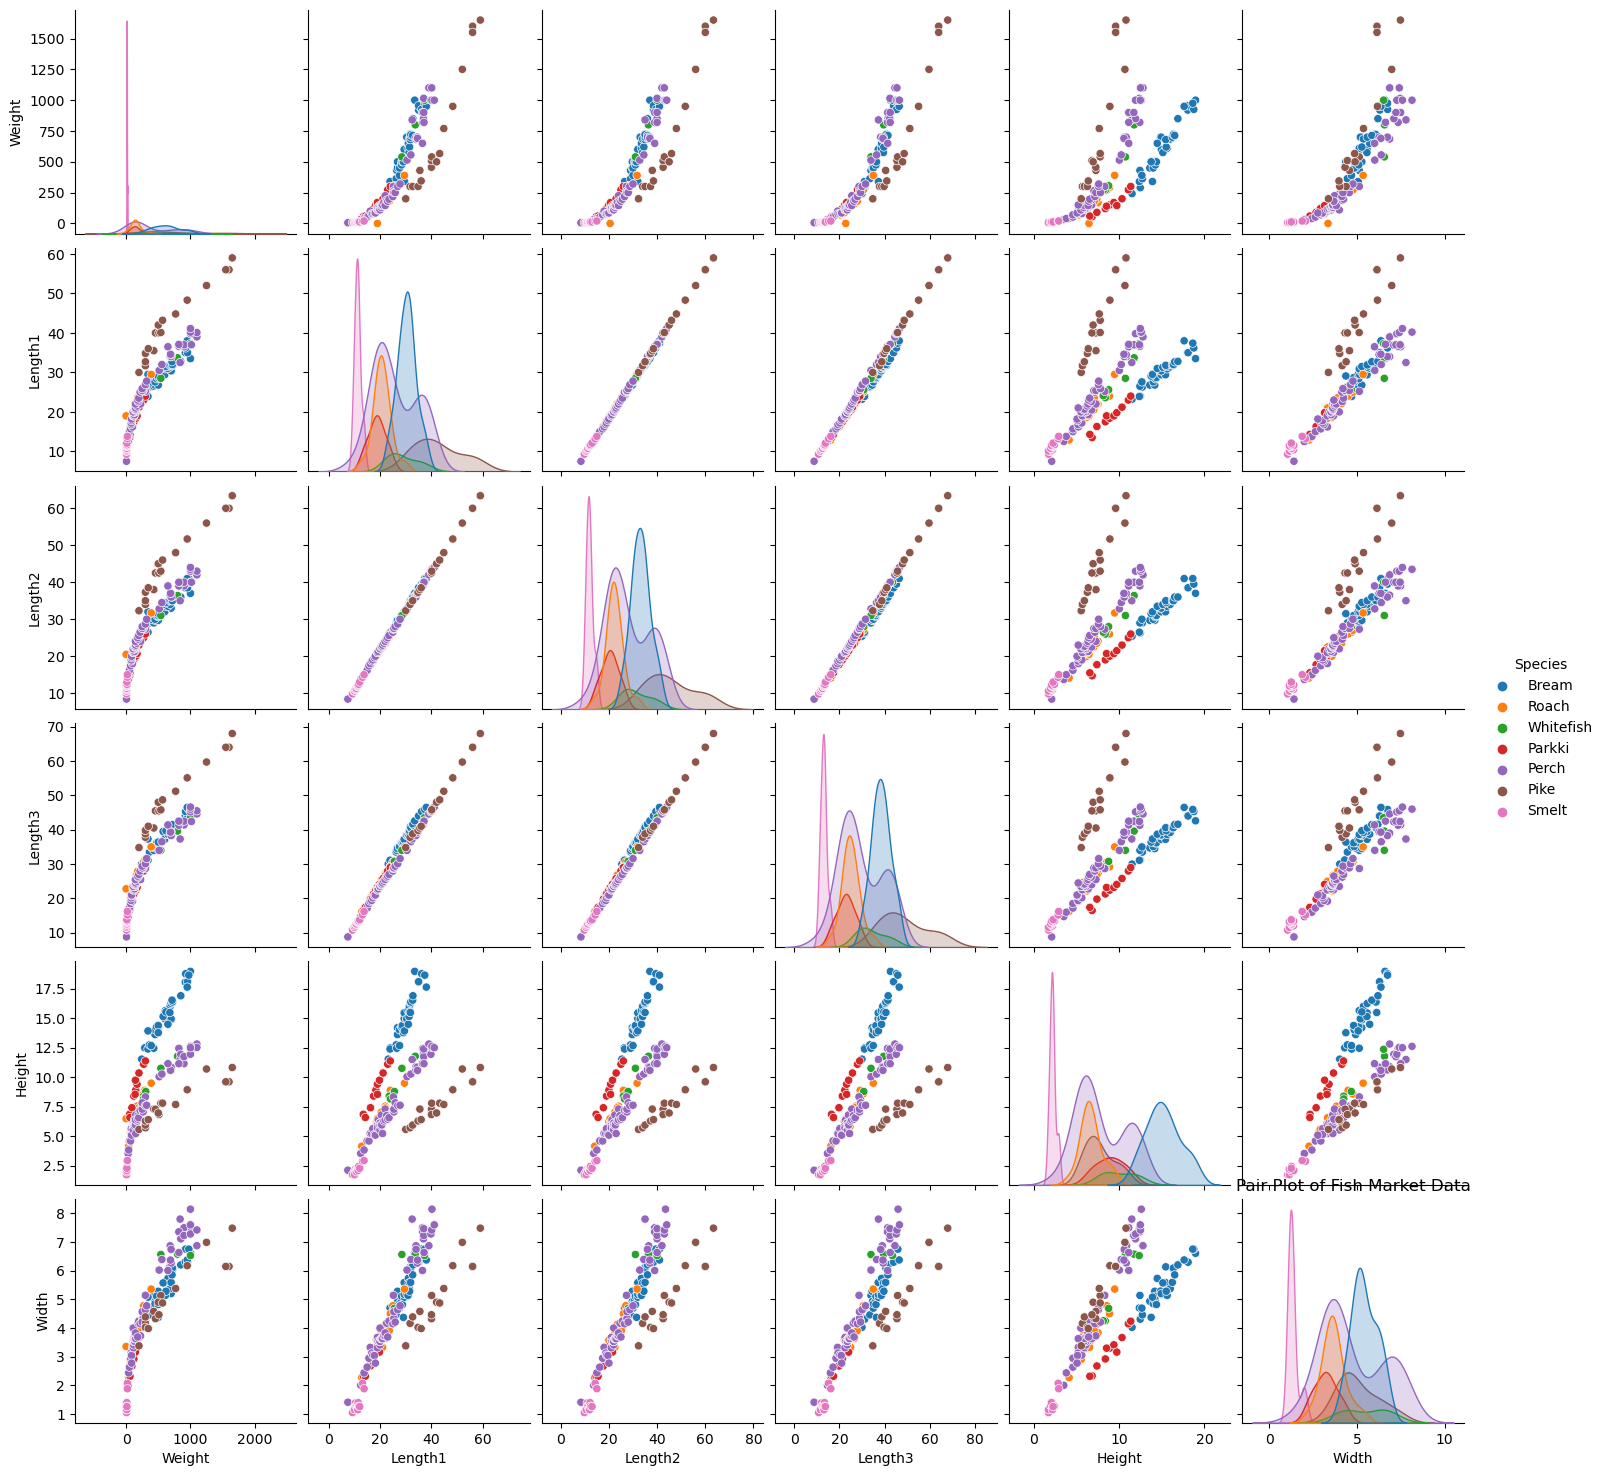

In [7]:
sb.pairplot(df, hue='Species')
plt.title('Pair Plot of Fish Market Data')
plt.show()


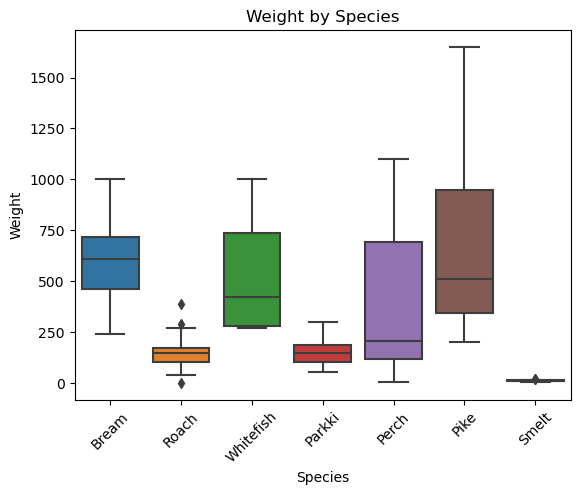

In [8]:
sb.boxplot(x='Species', y='Weight', data=df)
plt.title('Weight by Species')
plt.xticks(rotation=45)
plt.show()


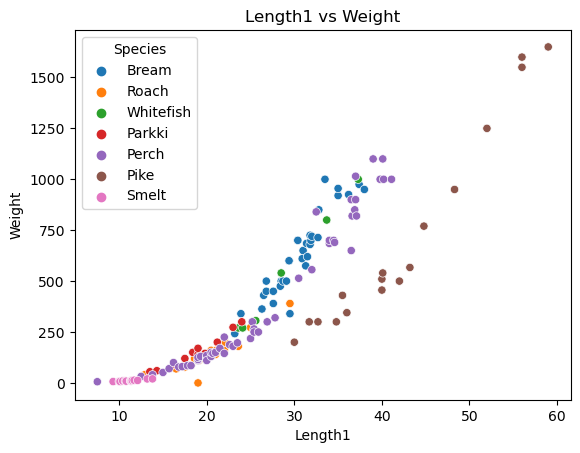

In [9]:
sb.scatterplot(x='Length1', y='Weight', data=df, hue='Species')
plt.title('Length1 vs Weight')
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.show()


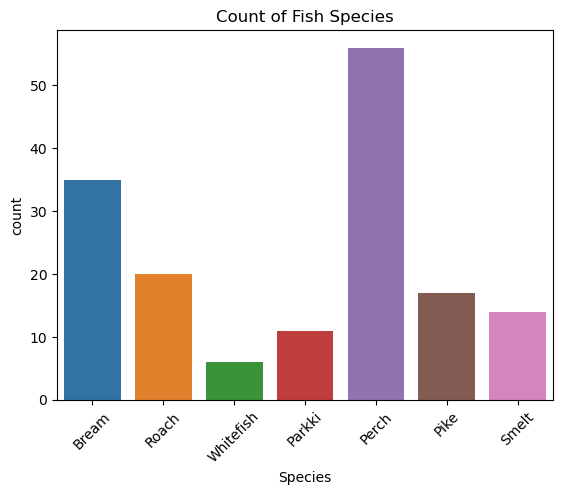

In [10]:
sb.countplot(x='Species', data=df)
plt.title('Count of Fish Species')
plt.xticks(rotation=45)
plt.show()


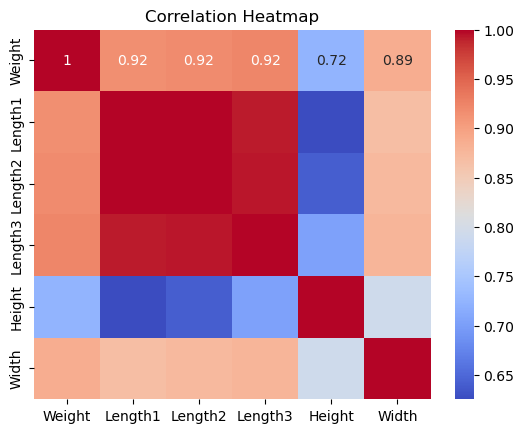

In [12]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [13]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=42)
df_train

,Species,Weight,Length1,Length2,Length3,Height,Width
85,Perch,130.0,19.3,21.3,22.8,6.3840,3.5340
81,Perch,85.0,18.2,20.0,21.0,5.0820,2.7720
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
11,Bream,500.0,28.7,31.0,36.2,14.3714,4.8146
109,Perch,514.0,30.5,32.8,34.0,10.0300,6.0180
...,...,...,...,...,...,...,...
71,Parkki,300.0,24.0,26.0,29.0,11.3680,4.2340
106,Perch,250.0,25.9,28.0,29.4,7.8204,4.2042
14,Bream,600.0,29.4,32.0,37.2,14.9544,5.1708
92,Perch,150.0,20.5,22.5,24.0,6.7920,3.6240


In [14]:
# Check if there are any '?' in the entire DataFrame
has_question_marks_train = (df_train == '?').any().any()
print("Any '?' in df_train:", has_question_marks_train)

has_question_marks_test = (df_test == '?').any().any()
print("Any '?' in df_test:", has_question_marks_test)

Any '?' in df_train: False
Any '?' in df_test: False


In [15]:
# Check for NaN values in df_train
any_nan_train = df_train.isnull().values.any()
print(f"Any NaN values in df_train: {any_nan_train}")

# Check for NaN values in df_test
any_nan_test = df_test.isnull().values.any()
print(f"Any NaN values in df_test: {any_nan_test}")


Any NaN values in df_train: False
Any NaN values in df_test: False


In [16]:
#df_train.replace('?', np.nan, inplace=True)
#df_test.replace('?', np.nan, inplace=True)
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [17]:
df.dropna(inplace = True)
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 85 to 102
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  111 non-null    object 
 1   Weight   111 non-null    float64
 2   Length1  111 non-null    float64
 3   Length2  111 non-null    float64
 4   Length3  111 non-null    float64
 5   Height   111 non-null    float64
 6   Width    111 non-null    float64
dtypes: float64(6), object(1)
memory usage: 6.9+ KB


In [19]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

#Train df (Feature extraction )

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train['Weight'] = scaler.fit_transform(df_train[['Weight']])


In [22]:
df_train['Length1'] = scaler.fit_transform(df_train[['Length1']])
df_train['Length2'] = scaler.fit_transform(df_train[['Length2']])
df_train['Length3'] = scaler.fit_transform(df_train[['Length3']])


In [29]:
df_train['Volume'] = df_train['Length1'] * df_train['Length2'] * df_train['Length3']


In [23]:
df_train['Height'] = scaler.fit_transform(df_train[['Height']])
df_train['Width'] = scaler.fit_transform(df_train[['Width']])


In [24]:
####################
# Drop columns that are not needed for training


In [25]:
# check for any remaining categorical columns. This will help you identify which columns still need to be processed or encoded before moving on to modeling.
df_train.select_dtypes(exclude = np.number).columns

Index(['Species'], dtype='object')

In [26]:
df_train.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

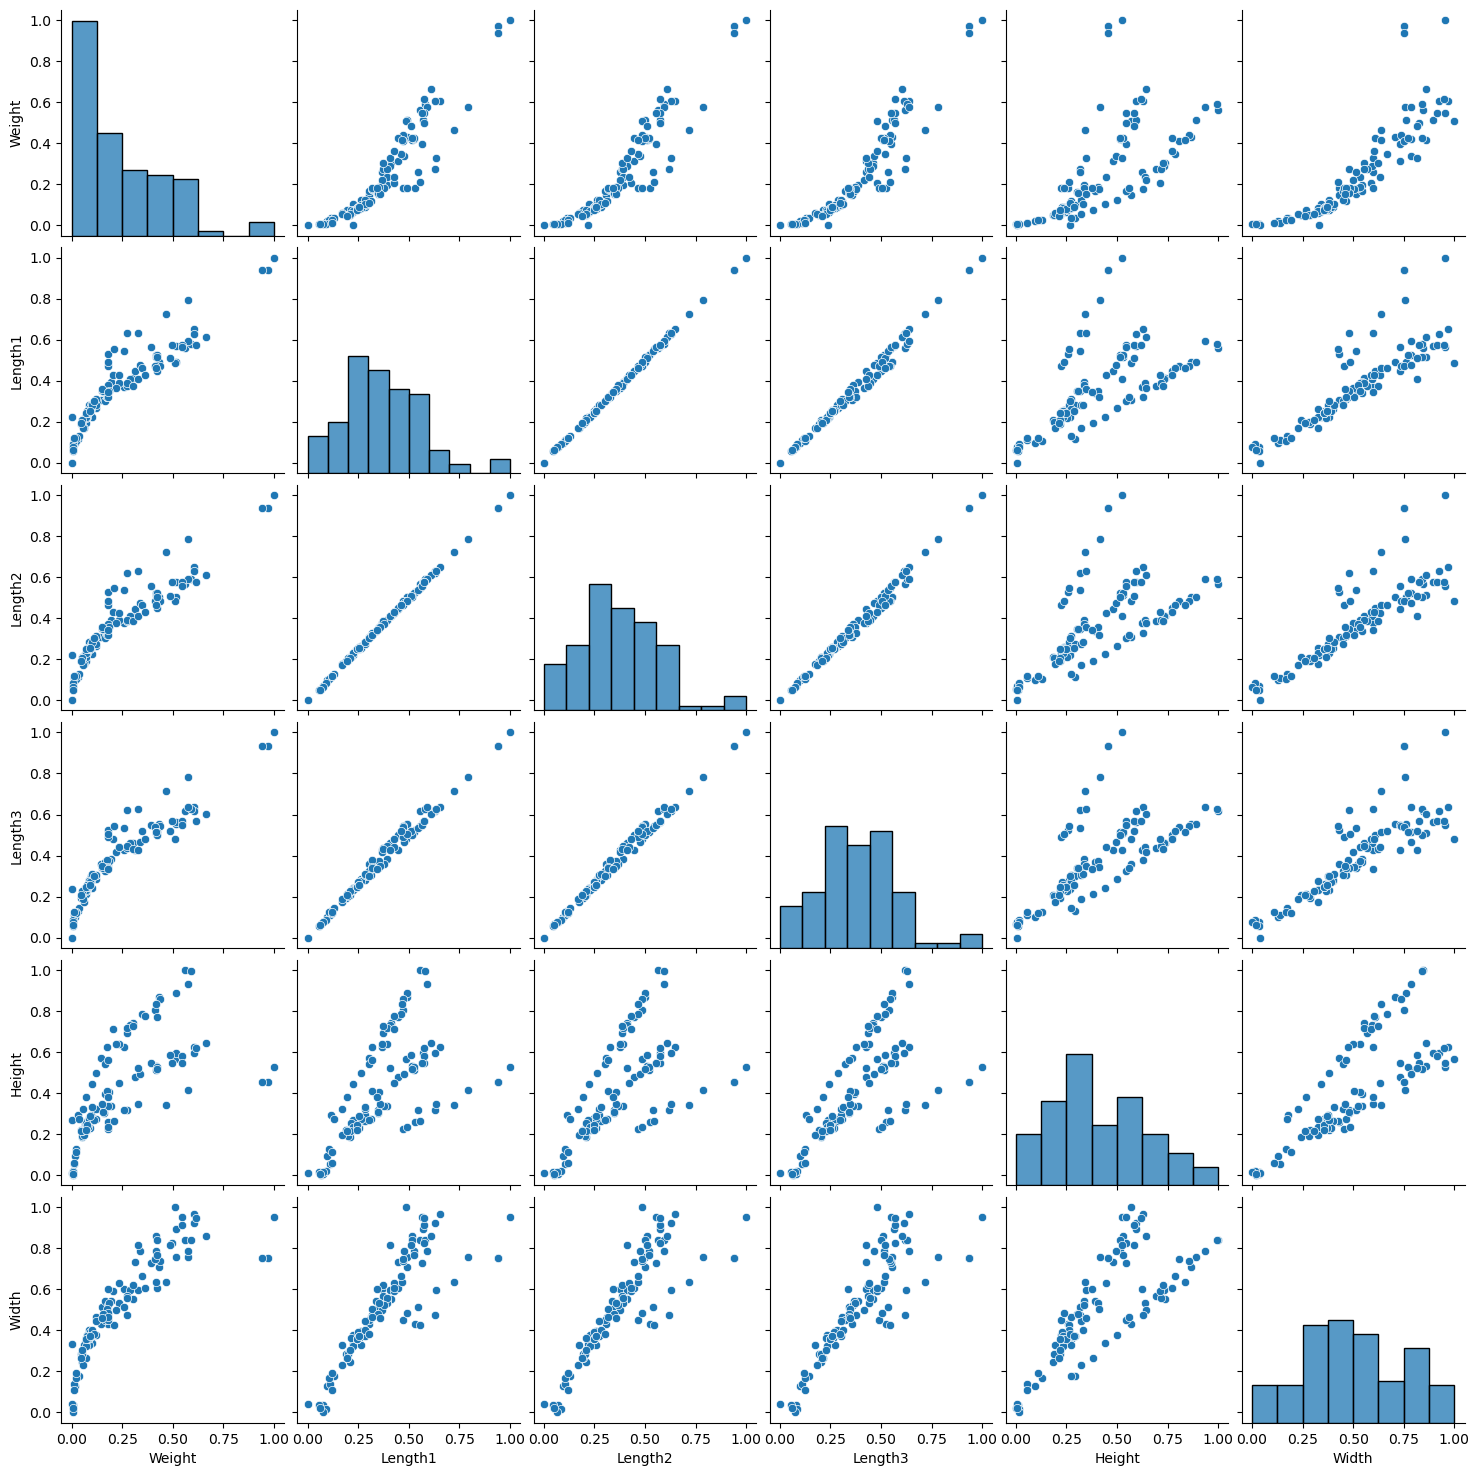

In [28]:
sb.pairplot(df_train)
plt.show()

#Test df (Feature extraction )

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_test['Weight'] = scaler.fit_transform(df_test[['Weight']])


In [32]:
df_test['Length1'] = scaler.fit_transform(df_test[['Length1']])
df_test['Length2'] = scaler.fit_transform(df_test[['Length2']])
df_test['Length3'] = scaler.fit_transform(df_test[['Length3']])


In [34]:
df_test['Volume'] = df_test['Length1'] * df_test['Length2'] * df_test['Length3']


In [33]:
df_test['Height'] = scaler.fit_transform(df_test[['Height']])
df_test['Width'] = scaler.fit_transform(df_test[['Width']])


In [35]:
#####################################
# Remove unnecessary columns from the test DataFrame

In [36]:
df_test.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Volume'],
      dtype='object')

In [37]:
df_train.isna().sum()
df_train.dropna(inplace = True)
df_train.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Volume     0
dtype: int64

In [38]:
df_test.isna().sum()
df_test.dropna(inplace = True)
df_test.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
Volume     0
dtype: int64

In [39]:
categorical= df_train.select_dtypes(exclude = np.number).columns
categorical

Index(['Species'], dtype='object')

In [40]:
classes = dict()
le = LabelEncoder()
for col in categorical:
    df_train[col]= le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])
    classes[col] = le.classes_

In [41]:
df_train.dropna(inplace = True)
df_test.dropna(inplace = True)

In [42]:
print(df_train.columns)
print(df_test.columns)

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Volume'],
      dtype='object')
Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width',
       'Volume'],
      dtype='object')


In [44]:
x_train, y_train = df_train.drop(columns='Weight').values, df_train['Weight'].values
x_test, y_test = df_test.drop(columns='Weight').values, df_test['Weight'].values


In [45]:
np.isinf(x_train).any()

False

In [46]:
reg = LinearRegression() # ols
reg.fit(x_train, y_train)

LinearRegression()

In [47]:
x_test.shape
x_train.shape

(111, 7)

In [48]:
print(np.isinf(x_test).any())  # Check for infinite values
print(np.isnan(x_test).any())  # Check for NaN values


False
False


In [49]:
y_pred = reg.predict(x_test)

In [50]:
y_pred[:10]

array([ 0.05828969, -0.03019056,  0.10253109,  0.1731352 ,  0.06091441,
        0.52028702, -0.04098345,  0.13368924,  0.12872552,  1.10047162])

In [51]:
y_test[:10]

array([5.73473820e-02, 5.38888442e-03, 1.55473337e-01, 2.11775115e-01,
       1.15257782e-01, 7.98922223e-01, 2.41293332e-04, 1.39387115e-01,
       1.45821604e-01, 1.00000000e+00])

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred)

(0.8455191306292286, 0.012241569306316176, 0.0798125962347631)

In [53]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)
y_pred_ridge = ridge_reg.predict(x_test)

In [54]:
r2_score(y_test, y_pred_ridge), mean_squared_error(y_test, y_pred_ridge), mean_absolute_error(y_test, y_pred_ridge)

(0.848541337436354, 0.012002079755032972, 0.07966335219059029)

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Make sure y_train is defined correctly
y = df_train['Weight'].values  # Change this to your target variable

for d in range(2, 9):
    # Create polynomial features
    poly = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly.fit_transform(x_train)

    # Split the data into training and testing sets
    x_train_split, x_test_split, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)
    
    # Fit the linear regression model
    reg = LinearRegression()
    reg.fit(x_train_split, y_train)
    
    # Predict on the test set
    y_pred = reg.predict(x_test_split)
    
    # Print the R^2 score
    print(f"Degree = {d}, R2 = {r2_score(y_test, y_pred)}")


Degree = 2, R2 = 0.8974278045841644
Degree = 3, R2 = -23.45042891309812
Degree = 4, R2 = -1010.806429124226
Degree = 5, R2 = -6462.150229293962
Degree = 6, R2 = -32721.23050393877
Degree = 7, R2 = -216771.44640884563
Degree = 8, R2 = -2727481.531392373
